===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product_Name    1809 non-null   object        
 1   Week            1809 non-null   datetime64[ns]
 2   Year            1809 non-null   int64         
 3   Week_Number     1809 non-null   int64         
 4   Total_Quantity  1809 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 70.8+ KB
None

===== Summary Statistics =====
count    1809.000000
mean        9.956329
std        17.648071
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max       136.000000
Name: Total_Quantity, dtype: float64

===== Unique Products =====
['CLINMISKIN GEL' 'DESWIN  TAB' 'K GLIM-M 1MG' 'MEFORNIX P'
 'MONTEMAC FX TAB' 'MOXCLAV 625' 'PANTOP - 40  TAB' 'TELMIGET  40  TAB'
 'TIBRIO']

===== Missing Values

C:\Users\Strix\AppData\Local\Temp\ipykernel_31092\2889963206.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name', y='Total_Quantity', data=total_sales_per_product, palette='viridis')


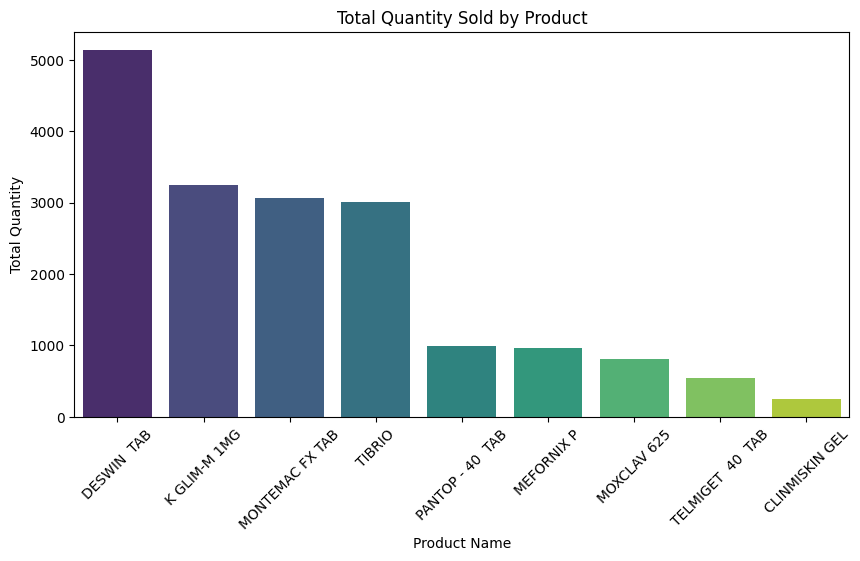

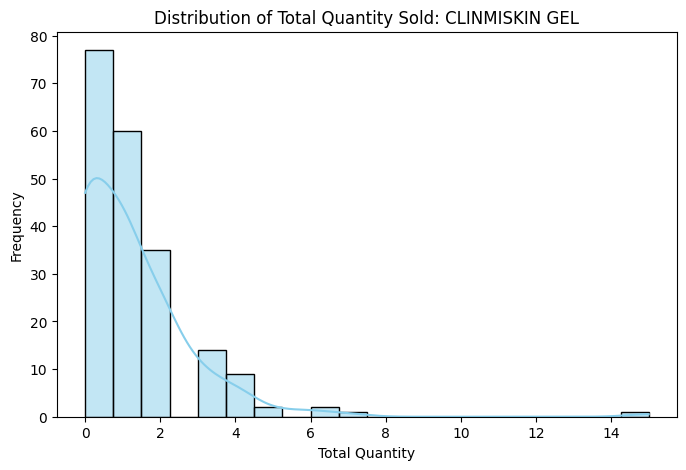

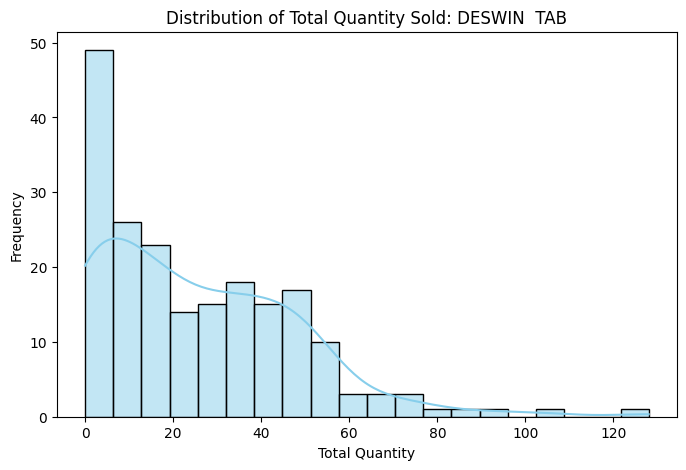

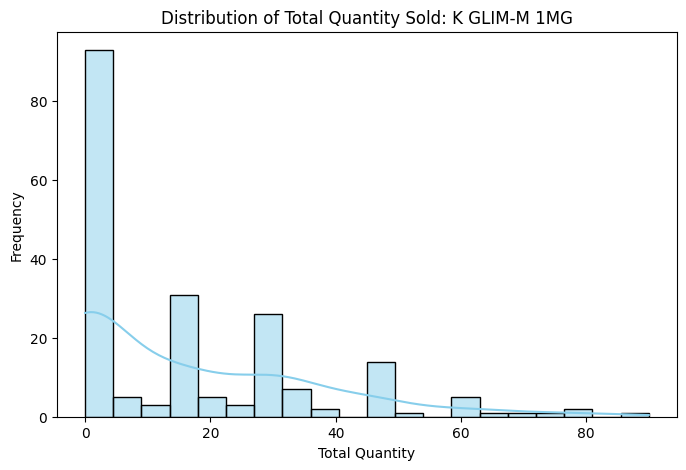

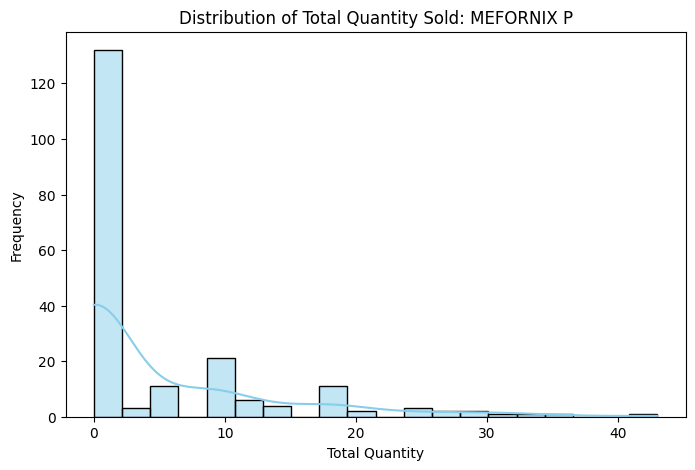

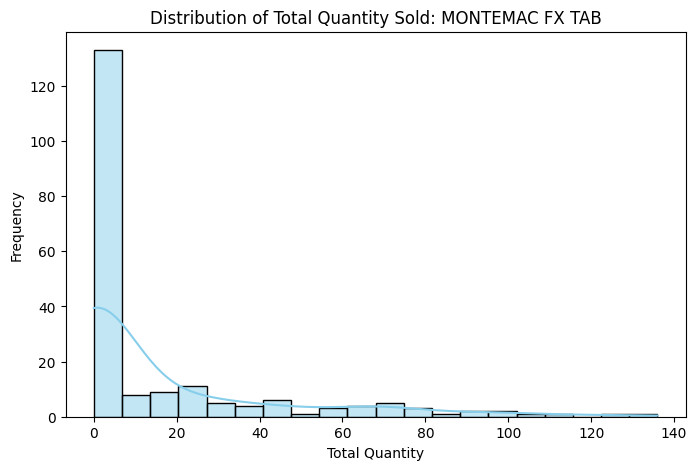

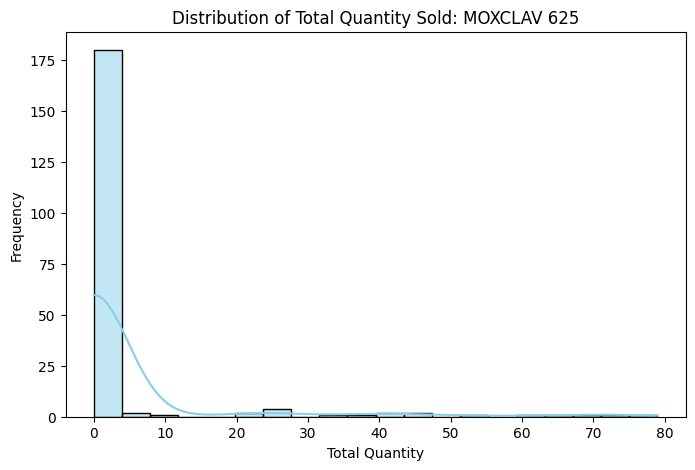

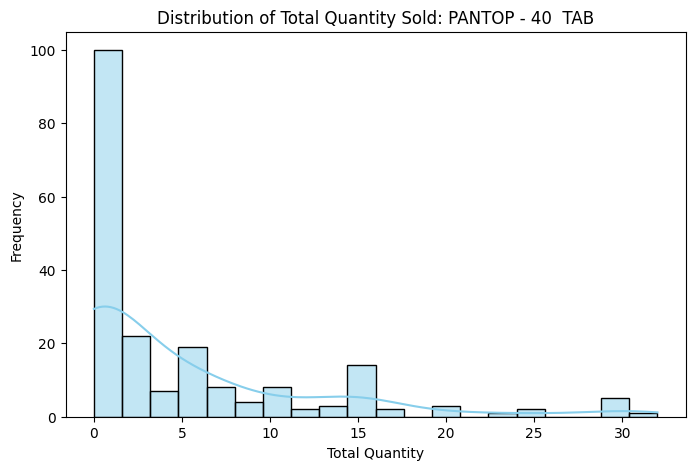

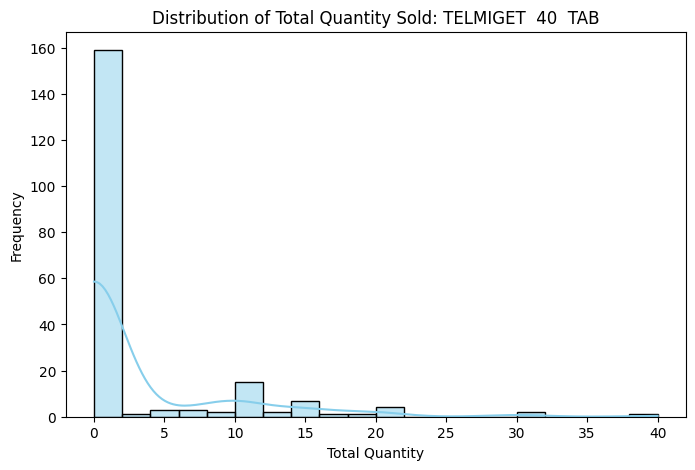

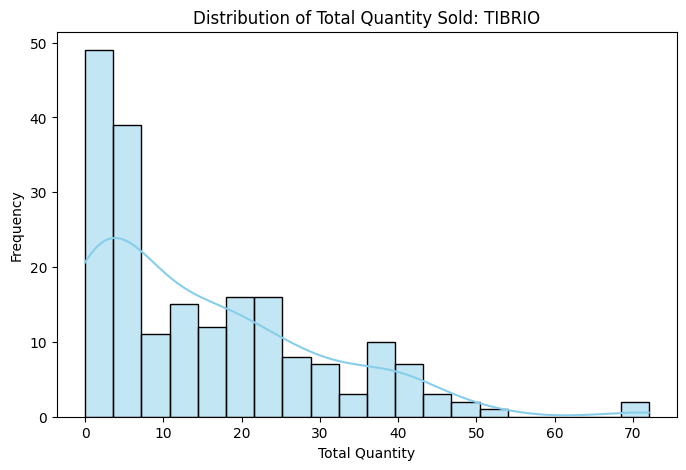

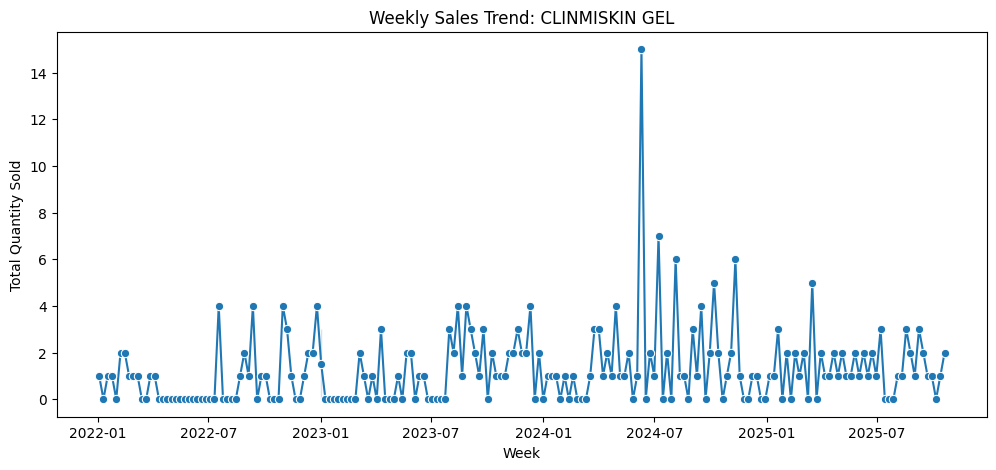

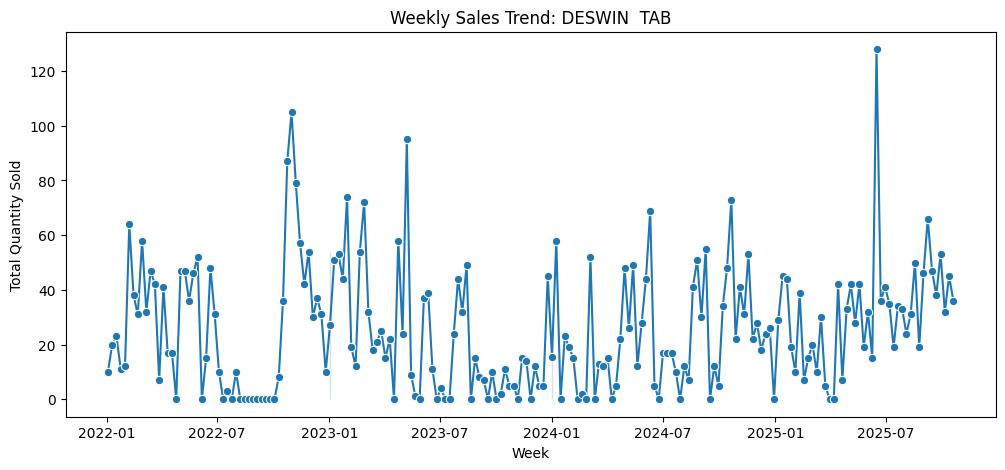

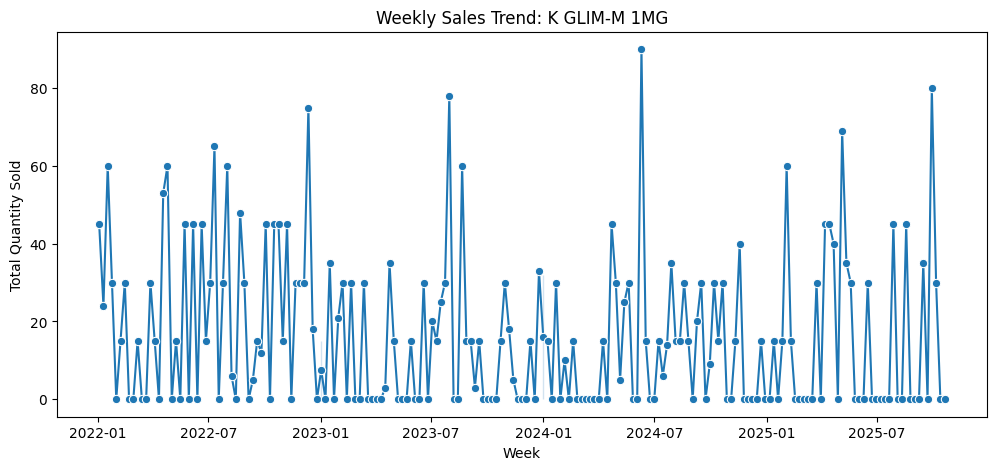

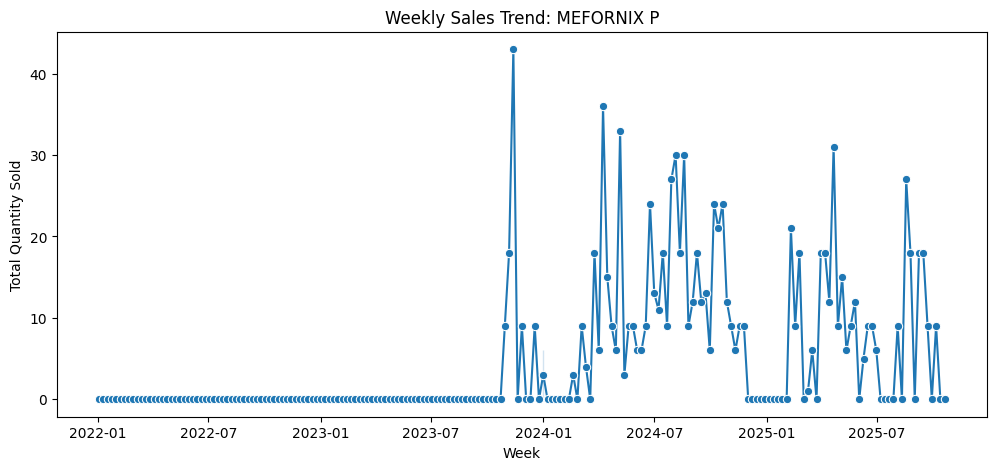

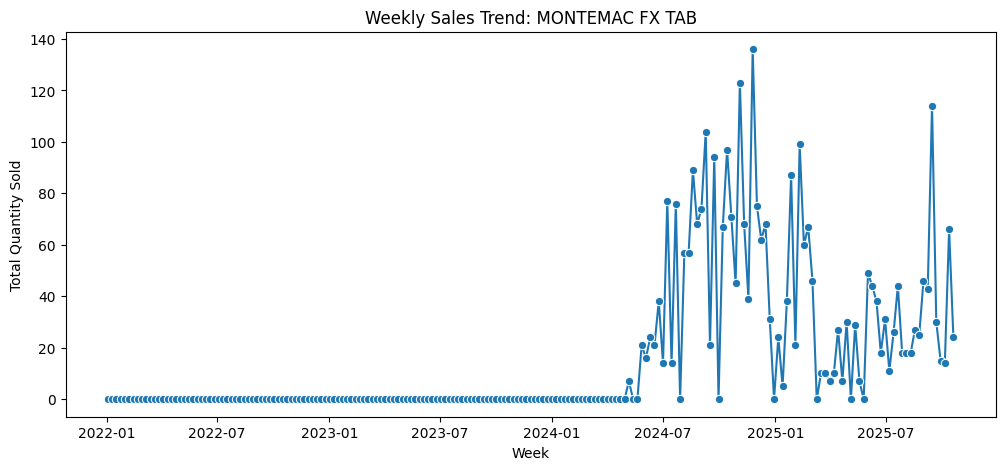

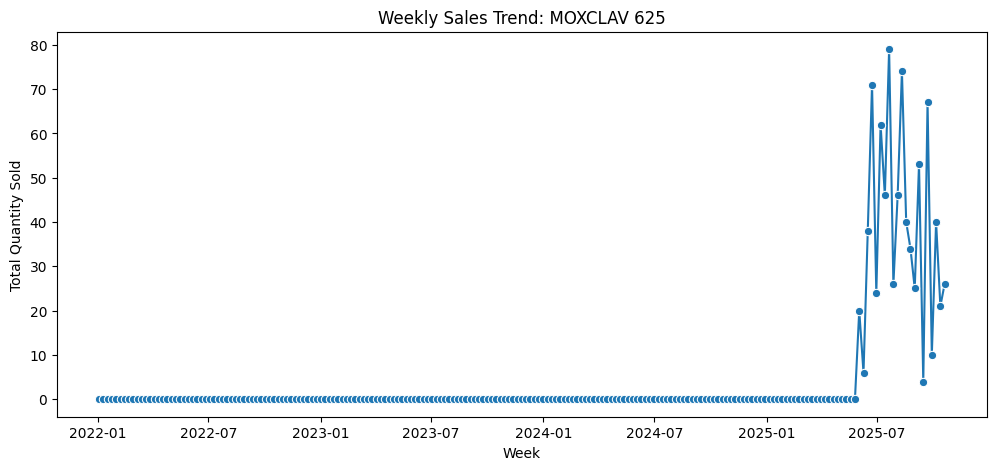

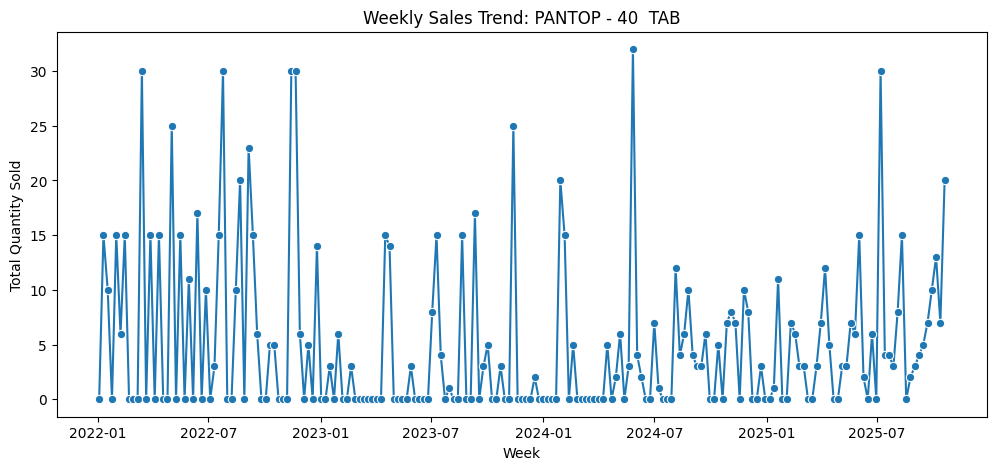

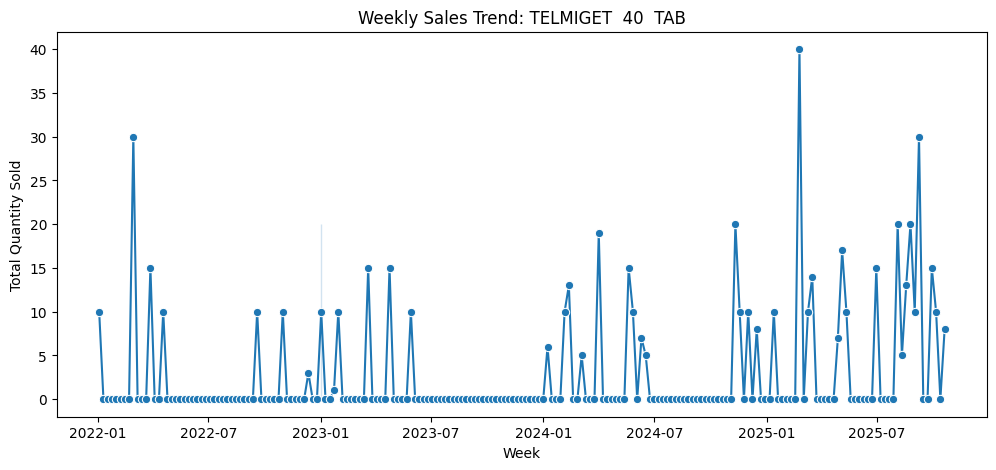

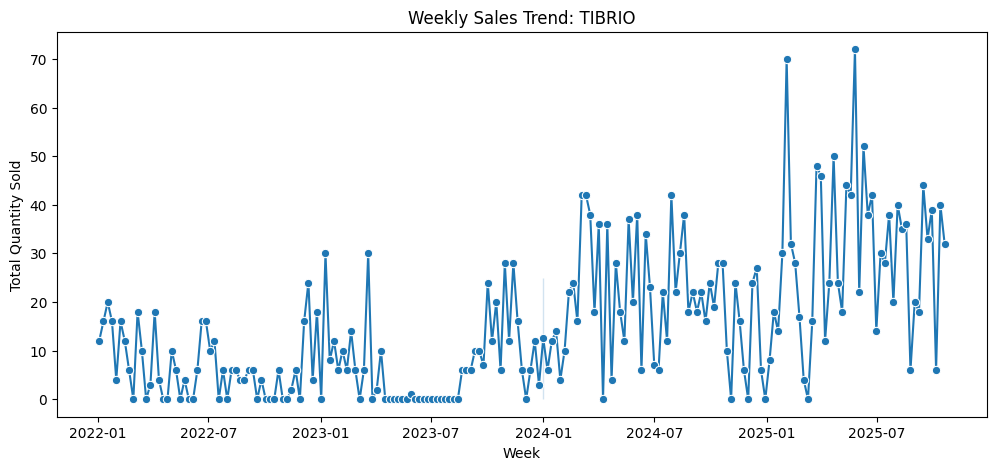


===== Weeks with Zero Sales per Product =====
        Product_Name  Zero_Sales_Weeks
0     CLINMISKIN GEL                77
1        DESWIN  TAB                36
2       K GLIM-M 1MG                91
3         MEFORNIX P               131
4    MONTEMAC FX TAB               132
5        MOXCLAV 625               180
6   PANTOP - 40  TAB                97
7  TELMIGET  40  TAB               158
8             TIBRIO                44


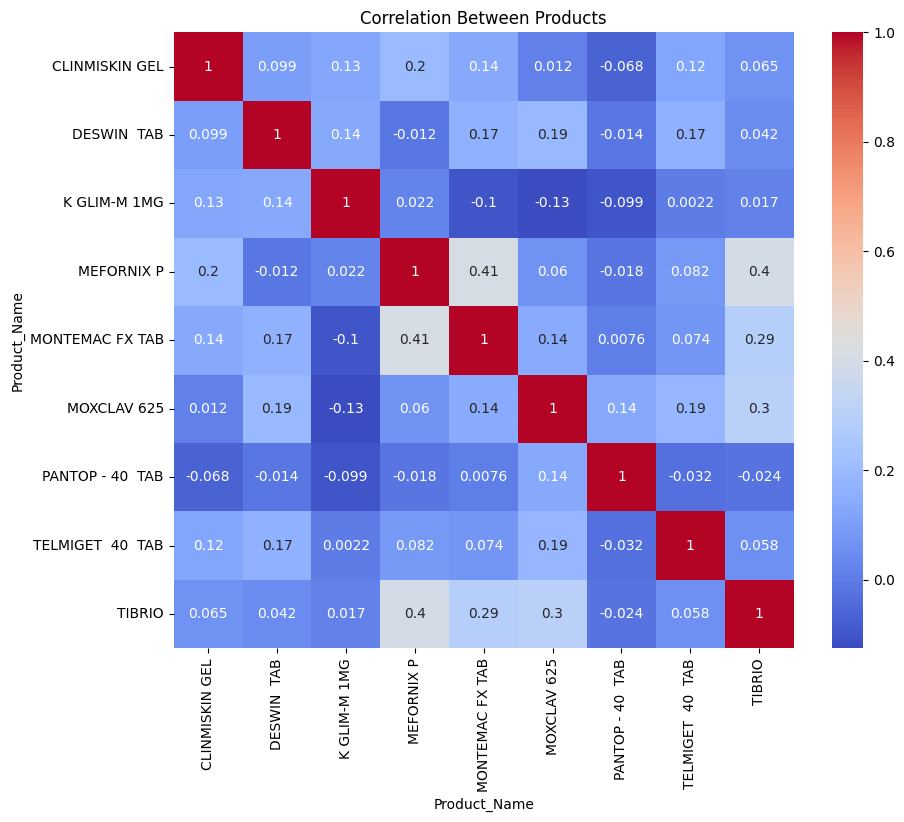

In [2]:
# ===================== Complete EDA Script (Individual Product Plots) =====================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------- Load Data ---------------------
df = pd.read_excel('../data/demand_prediction_weekly.xlsx')  # Replace with your file path

# Convert 'Week' to datetime (first day of the week)
df['Week'] = pd.to_datetime(df['Week'] + '-1', format='%Y-W%W-%w')

# --------------------- Basic Info ---------------------
print("===== Dataset Info =====")
print(df.info())
print("\n===== Summary Statistics =====")
print(df['Total_Quantity'].describe())
print("\n===== Unique Products =====")
products = df['Product_Name'].unique()
print(products)

# --------------------- Missing Values ---------------------
print("\n===== Missing Values =====")
print(df.isnull().sum())

# --------------------- Total Sales per Product (Quantity) ---------------------
total_sales_per_product = df.groupby('Product_Name')['Total_Quantity'].sum().reset_index()
total_sales_per_product = total_sales_per_product.sort_values(by='Total_Quantity', ascending=False)
print("\n===== Total Quantity Sold per Product =====")
print(total_sales_per_product)

# Bar plot of total sales
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Name', y='Total_Quantity', data=total_sales_per_product, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Quantity Sold by Product')
plt.ylabel('Total Quantity')
plt.xlabel('Product Name')
plt.show()

# --------------------- Distribution of Total Quantity ---------------------
for product in products:
    plt.figure(figsize=(8,5))
    sns.histplot(df[df['Product_Name']==product]['Total_Quantity'], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of Total Quantity Sold: {product}')
    plt.xlabel('Total Quantity')
    plt.ylabel('Frequency')
    plt.show()

# --------------------- Sales Trend Over Time (Individual Product) ---------------------
for product in products:
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df[df['Product_Name']==product], x='Week', y='Total_Quantity', marker='o')
    plt.title(f'Weekly Sales Trend: {product}')
    plt.xlabel('Week')
    plt.ylabel('Total Quantity Sold')
    plt.show()

# --------------------- Zero Sales Weeks ---------------------
zero_sales = df[df['Total_Quantity'] == 0].groupby('Product_Name')['Week_Number'].count().reset_index()
zero_sales = zero_sales.rename(columns={'Week_Number': 'Zero_Sales_Weeks'})
print("\n===== Weeks with Zero Sales per Product =====")
print(zero_sales)

# --------------------- Correlation Between Products (Multi-Year Safe) ---------------------
# Aggregate duplicates per year-week-product
df_agg = df.groupby(['Year', 'Week_Number', 'Product_Name'])['Total_Quantity'].sum().reset_index()

# Create a unique index combining Year and Week
df_agg['Year_Week'] = df_agg['Year'].astype(str) + '-W' + df_agg['Week_Number'].astype(str)

# Pivot for correlation
pivot_df = df_agg.pivot(index='Year_Week', columns='Product_Name', values='Total_Quantity')

plt.figure(figsize=(10,8))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Products')
plt.show()

# ===================== End of EDA =====================
